In [ ]:
%%capture
import wandb

# initialize wandb
wandb.init(project="final-finetuning", name="5th-run")

In [ ]:
# Dataset Loading

%%capture
from datasets import load_dataset

dataset = load_dataset("scaredmeow/shopee-reviews-tl-binary")

import pandas as pd

train = pd.read_csv("../data/dataset/train.csv")
test = pd.read_csv("../data/dataset/test.csv")
validation = pd.read_csv("../data/dataset/validation.csv")

valid = validation[validation.label == 1].text.tolist()[:50]
valid.extend(validation[validation.label == 0].text.tolist()[:50])
valid_label = validation[validation.label == 1].label.tolist()[:50]
valid_label.extend(validation[validation.label == 0].label.tolist()[:50])
valid

In [81]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load the pretrained model
pretrained = "../models/fine-tuned-roberta-1st-iter"
tokenizer = AutoTokenizer.from_pretrained(pretrained)
model = AutoModelForSequenceClassification.from_pretrained(pretrained, num_labels=2)


inputs = tokenizer(
    valid, return_tensors="pt", padding=True, truncation=True
)


with torch.no_grad():
    out = model(**inputs)

# pred_ix = out['logits'][0, 7].argmax()
# pred = tokenizer.convert_ids_to_tokens([pred_ix])[0]


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [82]:
import numpy as np

pred = np.argmax(out.logits, axis=1).tolist()
true = valid_label


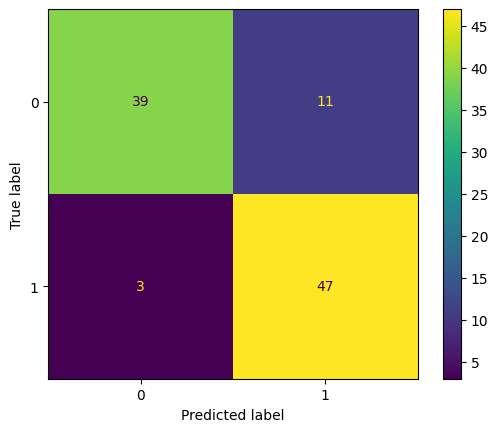

Accuracy: 0.86
Precision: 0.8694581280788177
Recall: 0.86
F1 score: 0.8590982286634461


In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Compute the confusion matrix
cm = confusion_matrix(true, pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

# Compute the accuracy
acc = accuracy_score(true, pred)
print("Accuracy:", acc)

# Compute the precision
prec = precision_score(true, pred, average="macro")
print("Precision:", prec)

# Compute the recall
rec = recall_score(true, pred, average="macro")
print("Recall:", rec)

# Compute the f1 score
f1 = f1_score(true, pred, average="macro")
print("F1 score:", f1)

# # Compute the log-loss
# ll = log_loss(true, pred, labels=[0, 1, 2, 3, 4])
# print("Log-loss:", ll)

# # Compute the AUC-ROC
# auc = roc_auc_score(true, pred, average="macro", multi_class="ovr")
# print("AUC-ROC:", auc)
